# REPORTE PRÁCTICA 7: Regresión múltiple con statsmodels

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio que permitirá evaluar las condiciones de reinserción social dentro del CERESO "Apodaca" y dentro del Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción. 

El objetivo de este reporte es trabajar con modelos de regresión múltiple y usar los resultados obtenidos como un clasificador de alguna variable de interés.

Esta práctica se continúa trabajando sobre los mismos datos de la anterior, pero en esta los modelos lineales tienen más de un factor para poder modelar conjuntamente la variable de interés. Se agregaron dos columnas nuevas para trabajar con las columnas de crimen y educación de los internos, ya que estas son de tipo **string** y se categorizaron para poderlas utilizar en los modelos de regresión múltiple. A continuación, se muestran estas dos columnas y sus valores categóricos.


In [121]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('practica6.csv', index_col=0)
X = df.copy()
y = X.pop('education')

df.head()
print(y.groupby(X.educacion).unique())

X = df.copy()
y = X.pop('crime')

df.head()
print(y.groupby(X.crimen).unique())


educacion
Comercial       [6.0]
Licenciatura    [5.0]
Preparatoria    [3.0]
Primaria        [1.0]
Secretaria      [7.0]
Secundaria      [2.0]
Tecnico         [4.0]
Name: education, dtype: object
crimen
Accidente                         [9.0]
Armas                             [8.0]
Atentado al pudor                [11.0]
Chantaje                         [12.0]
Contra la salud                   [6.0]
Dano a instituciones publicas    [10.0]
Dano en propiedad ajena          [10.0]
Delicuencia organizada           [13.0]
Despojo de inmueble              [14.0]
Drogas                            [9.0]
Drogas y Armas                    [5.0]
Empapelado                       [15.0]
Federal                          [16.0]
Fraude                           [17.0]
Homicidio                         [2.0]
Lesiones                         [18.0]
Narcomenudeo                     [19.0]
Pension alimenticia              [20.0]
Privacion de la libertad         [21.0]
Robo                              [1.0

El siguiente código analiza los valores de las columnas de crimen, educación, años de sentencia e ingresos mensuales antes de entrar a la prisión, en función de la edad de los internos, primero para los hombres y luego para las mujeres.

In [129]:
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
male = x.loc[x.age >= 16] # Hombres
x = o.loc[o.gender == 'female']
female = x.loc[x.age >= 16] # Mujeres

for datos in [male, female]:
    d = pd.DataFrame(datos, columns = ["crime","age", "sentenceYears", "education", "incomePrev"])
    d = d.dropna() # ignoremos renglones que contienen por lo menos un NaN para estos campos
    n = len(d)
    if n >= 8: # no se puede con menos de ocho
        y = d["age"]
        x = d[["crime","sentenceYears", "education", "incomePrev"]]
        x = sm.add_constant(x) # para contar con la b en nuestra f()
        m = sm.OLS(y, x).fit() 
        print(datos.gender.unique()[0])
        print(m.summary())

male
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.299
Date:                Tue, 12 Mar 2019   Prob (F-statistic):             0.0121
Time:                        16:41:46   Log-Likelihood:                -763.07
No. Observations:                 204   AIC:                             1536.
Df Residuals:                     199   BIC:                             1553.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.8322      2.225     1

Para el caso de la variable crimen, por ejemplo, se puede ver que este modelo tiene un valor de R cuadrado o porcentaje de varianza: 0.062 y 0.130 (hombres y mujeres), lo que significa que estos modelos explican unos porcientos muy bajos de la varianza en la variable dependiente. Se puede ver que ninguna de las variables crimen, educación, años de sentencia e ingresos mensuales son estadísticamente significativas para predecir (o estimar) la edad de los internos. 

El siguiente código verifica la correlación entre los diferentes tipos de crímenes y las variables edad, años de sentencia, ingresos mensuales y nivel de educación, donde únicamente se vio más correlación en el delito del tipo Violación en el caso de las mujeres.

               education       age  sentenceYears  incomePrev
education       1.000000  0.165115      -0.165114    0.210475
age             0.165115  1.000000       0.500257    0.381184
sentenceYears  -0.165114  0.500257       1.000000    0.116058
incomePrev      0.210475  0.381184       0.116058    1.000000
               education       age  sentenceYears  incomePrev
education            1.0 -0.500000       0.000000    0.500000
age                 -0.5  1.000000       0.866025   -1.000000
sentenceYears        0.0  0.866025       1.000000   -0.866025
incomePrev           0.5 -1.000000      -0.866025    1.000000


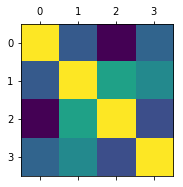

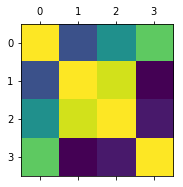

In [147]:
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
male = x.loc[x.crimen == 'Violacion'] # Hombres
x = o.loc[o.gender == 'female']
female = x.loc[x.crimen == 'Violacion'] # Mujeres


f = plt.figure()  
d = male
d = pd.DataFrame(d, columns = ["education","age", "sentenceYears", "incomePrev"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(121)
tmp = sf.matshow(d.corr())

f = plt.figure()  
d = female
d = pd.DataFrame(d, columns = ["education","age", "sentenceYears", "incomePrev"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(121)
tmp = sf.matshow(d.corr())



Tanto para los hombres y las mujeres, correlacionaron bastante parecidas las variables crimen, educación, edad, años de sentencia e ingresos mensuales antes de entrar a la prisión. En el caso de las mujeres que cometen el delito de Violación, si se ve un poco más de relación, entonces se realiza una gráfica de dispersión para revisar lo antes visto.

3


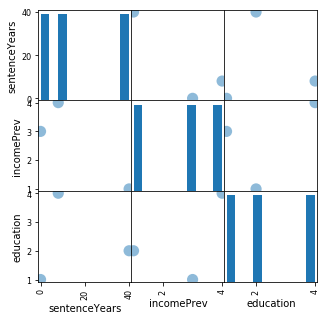

In [187]:
import matplotlib.pyplot as plt
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'female']
d = x.loc[x.crimen == 'Violacion']
d = pd.DataFrame(d, columns = ["sentenceYears", "incomePrev", "education"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (5,5), s = 500) 

No se puede concluir muchas cosas ya que son 3 mujeres nada más. Se prueban otras relaciones entre las variables para ver cómo se comportan.

                  crime       age  sentenceYears  incomePrev
crime          1.000000  0.993884      -0.554700   -0.577350
age            0.993884  1.000000      -0.643192   -0.510061
sentenceYears -0.554700 -0.643192       1.000000   -0.160128
incomePrev    -0.577350 -0.510061      -0.160128    1.000000
                  crime       age  sentenceYears  incomePrev
crime          1.000000 -0.902421      -0.192613   -0.717593
age           -0.902421  1.000000       0.587454    0.654177
sentenceYears -0.192613  0.587454       1.000000    0.294331
incomePrev    -0.717593  0.654177       0.294331    1.000000


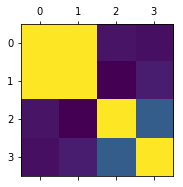

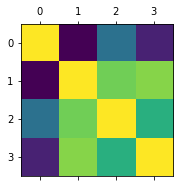

In [193]:
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
male = x.loc[x.educacion == 'Tecnico'] # Hombres
x = o.loc[o.gender == 'female']
female = x.loc[x.educacion == 'Tecnico'] # Mujeres


f = plt.figure()  
d = male
d = pd.DataFrame(d, columns = ["crime","age", "sentenceYears", "incomePrev"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(121)
tmp = sf.matshow(d.corr())

f = plt.figure()  
d = female
d = pd.DataFrame(d, columns = ["crime","age", "sentenceYears", "incomePrev"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(121)
tmp = sf.matshow(d.corr())

Se vuelve a probar las correlaciones entre las variables utilizadas anteriormente, pero esta vez con el nivel de escolaridad, resultando los datos con mayor correlación para el caso de los hombres y mujeres con nivel de educación Técnico. Se realiza un diagrama de dispersión para verificar.

4
4


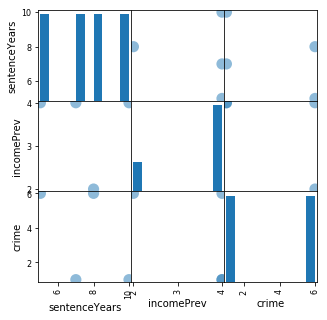

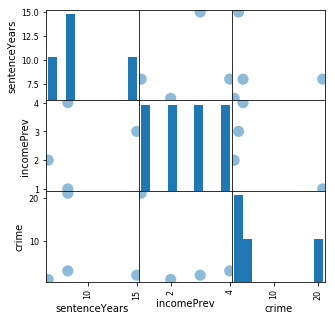

In [194]:
import matplotlib.pyplot as plt
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
d = x.loc[x.educacion == 'Tecnico']
d = pd.DataFrame(d, columns = ["sentenceYears", "incomePrev", "crime"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (5,5), s = 500) 


import matplotlib.pyplot as plt
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'female']
d = x.loc[x.educacion == 'Tecnico']
d = pd.DataFrame(d, columns = ["sentenceYears", "incomePrev", "crime"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (5,5), s = 500) 

Para el caso de las mujeres y hombres no se puede concluir mucho ya que solo son 4. Se intenta realizar el mismo trabajo, pero ahora para el nivel de educación Secundaria ya que en prácticas anteriores se vio que la mayoría de los internos tienen este nivel de educación.

                  crime       age  sentenceYears  incomePrev
crime          1.000000  0.109417      -0.035970   -0.079961
age            0.109417  1.000000       0.143207    0.123853
sentenceYears -0.035970  0.143207       1.000000   -0.124512
incomePrev    -0.079961  0.123853      -0.124512    1.000000
                  crime       age  sentenceYears  incomePrev
crime          1.000000  0.104847      -0.111782    0.199245
age            0.104847  1.000000      -0.103000   -0.062920
sentenceYears -0.111782 -0.103000       1.000000    0.129436
incomePrev     0.199245 -0.062920       0.129436    1.000000
116
29


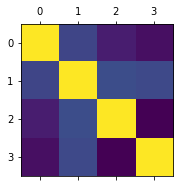

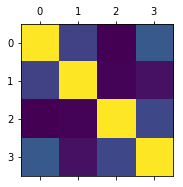

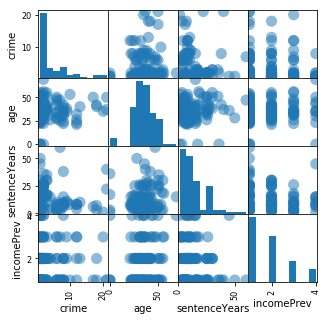

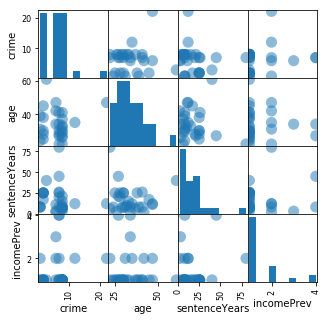

In [198]:
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
male = x.loc[x.educacion == 'Secundaria'] # Hombres
x = o.loc[o.gender == 'female']
female = x.loc[x.educacion == 'Secundaria'] # Mujeres


f = plt.figure()  
d = male
d = pd.DataFrame(d, columns = ["crime","age", "sentenceYears", "incomePrev"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(121)
tmp = sf.matshow(d.corr())

f = plt.figure()  
d = female
d = pd.DataFrame(d, columns = ["crime","age", "sentenceYears", "incomePrev"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(121)
tmp = sf.matshow(d.corr())

import matplotlib.pyplot as plt
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'male']
d = x.loc[x.educacion == 'Secundaria']
d = pd.DataFrame(d, columns = ["crime","age", "sentenceYears", "incomePrev"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (5,5), s = 500) 


import matplotlib.pyplot as plt
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
x = o.loc[o.gender == 'female']
d = x.loc[x.educacion == 'Secundaria']
d = pd.DataFrame(d, columns = ["crime","age", "sentenceYears", "incomePrev"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (5,5), s = 500) 

Se ve en las gráficas anteriores que la correlación entre las variables crimen, años de sentencia, edad e ingresos mensuales con respecto al nivel de educación Secundaria no es muy alta, pero la cantidad de internos que tienen alguna relación en en las variables analizadas es de 116 hombres y 29 mujeres.